# Support vector machines 
- Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

## The advantages of support vector machines are:

- Effective in high dimensional spaces.

    - Still effective in cases where number of dimensions is greater than the number of samples.

    - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

## The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

### The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. 
### SVMs decision function (detailed in the Mathematical formulation) depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_

## Linear SVC
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations. 
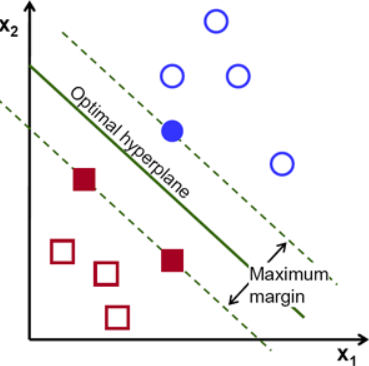

For linear kernel the equation for prediction for a new input using the dot product between the input (x) and each support vector (xi) is calculated as follows:
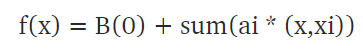
This is an equation that involves calculating the inner products of a new input vector (x) with all support vectors in training data. The coefficients B0 and ai (for each input) must be estimated from the training data by the learning algorithm.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

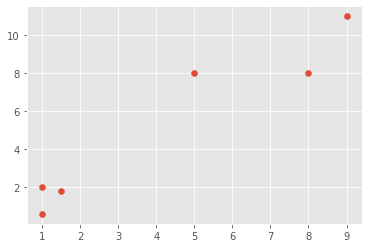

In [29]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

## Then we can graph this data using:
plt.scatter(x,y)
plt.show()

### So this is with two features, and we see we have a 2D graph

In [30]:
# Example
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
## For our labels, sometimes referred to as "targets," we're going to use 0 or 1.

y = np.array([0,1,0,1,0,1])

In [31]:
## define our classifier:

clf = svm.SVC(kernel='linear', C = 1.0)
## Our kernel is going to be linear, and C is equal to 1.0.

In [32]:
clf.fit(X,y)

SVC(kernel='linear')

[0.1380943  0.24462418]


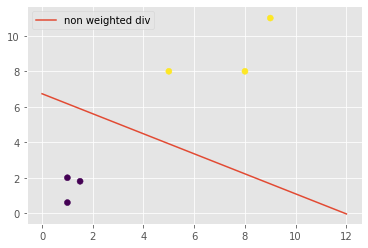

In [6]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy,label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

## VMs decision function (detailed in the Mathematical formulation) depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [33]:
# get support vectors
clf.support_vectors_


# get indices of support vectors
clf.support_

# get number of support vectors for each class
clf.n_support_

array([1, 1])

### Example : Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image.
- Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels

In [1]:
# importing required libraries:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
d=pd.read_csv("bill_authentication.csv")

In [3]:
d.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
d.shape

(1372, 5)

In [6]:
##Checking the correlation between each feature¶
d.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.679587
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.413439
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.133664
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.030585
Class,-0.679587,-0.413439,0.133664,-0.030585,1.000000


### Data Preprocessing
 
- Dividing the data into attributes and labels 
- Dividing the data into training and testing sets.

In [7]:
X = d.drop('Class', axis=1)  
y = d['Class'] 

### Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [8]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

### Training the Algorithm
The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm

In [10]:
# Running SVM with default hyperparameter.
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9818181818181818


In [11]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(kernel='linear')

In [12]:
y_pred = svclassifier.predict(X_test)  
print(metrics.accuracy_score(y_test,y_pred))

0.9672727272727273


## Model Evaluation 
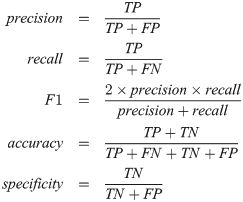

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[136   6]
 [  3 130]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       142
           1       0.96      0.98      0.97       133

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



### Conclusion
There is only one misclassification in the case of SVM algorithm

## Non-Linear SVM

### 1.The polynomial kernel 

The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these. In the context of regression analysis, such combinations are known as interaction features. The (implicit) feature space of a polynomial kernel is equivalent to that of polynomial regression, but without the combinatorial blowup in the number of parameters to be learned.Polynomial and exponential kernels calculates separation line in higher dimension.

- For degree-d polynomials, the polynomial kernel is defined as : 
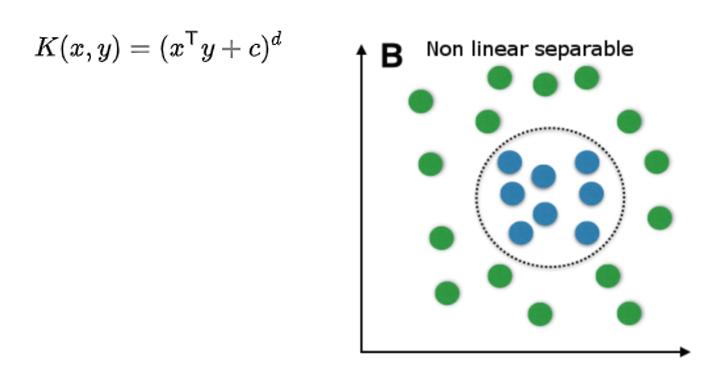

where x and y are vectors in the input space, i.e. vectors of features computed from training or test samples and c ≥ 0 is a free parameter trading off the influence of higher-order versus lower-order terms in the polynomial. When c = 0, the kernel is called homogeneous.

### 2. Gaussian Kernel
  
- It is simply a weighted linear combination of the kernel function computed between a data point and each of the support vectors.
- To use Gaussian kernel, you have to specify 'rbf'(Radial basis Function) as value for the Kernel parameter of the SVC class.
  The equation for RBF Kernel is :
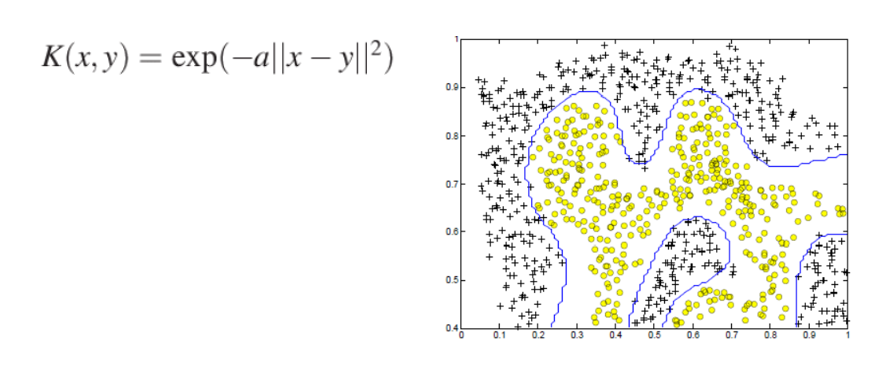
 

## Characteristics of SVM
### Regularization
The Regularization parameter (often termed as C parameter in python’s sklearn library) tells the SVM optimization how much you want to avoid misclassifying each training example.
For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

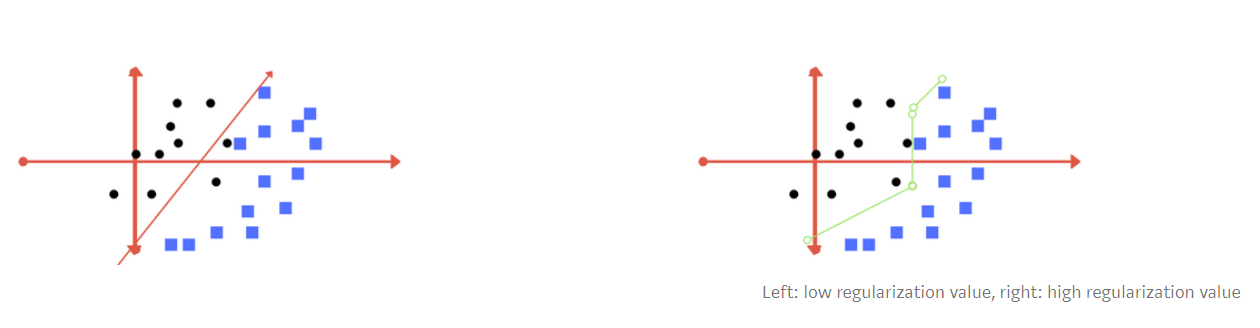

### Gamma
The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.
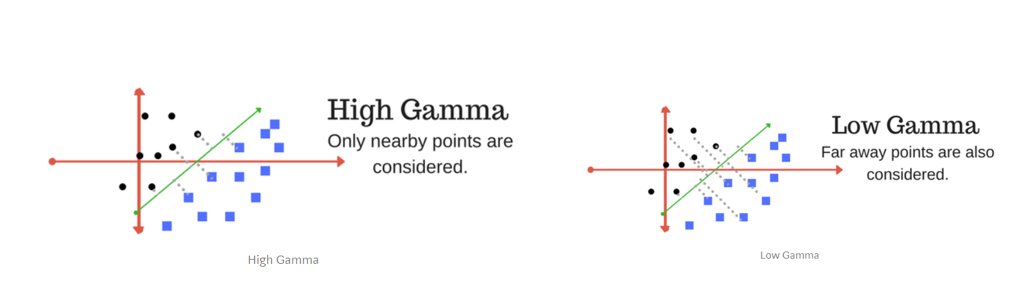

### Margin
And finally last but very importrant characteristic of SVM classifier. SVM to core tries to achieve a good margin.
A margin is a separation of line to the closest class points.
A good margin is one where this separation is larger for both the classes. Images below gives to visual example of good and bad margin. A good margin allows the points to be in their respective classes without crossing to other class.
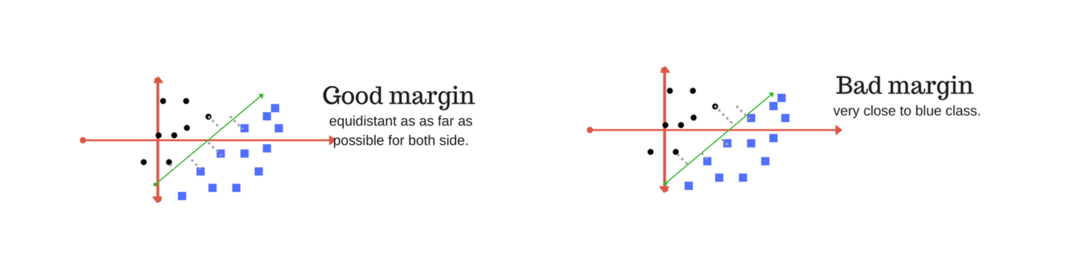

In [14]:
## Default RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9818181818181818


In [15]:
##Default Polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9781818181818182


## Performing K-fold cross validation with different kernels
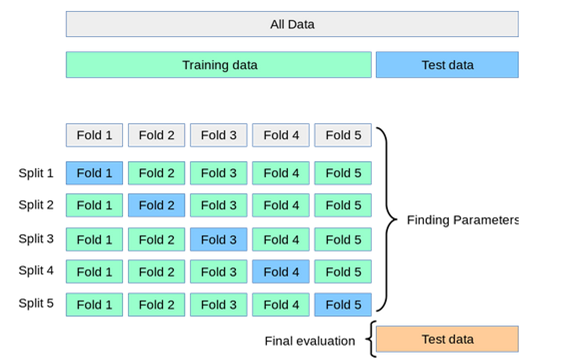

### 1. CV on Linear kernel

In [16]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.86956522 0.97826087 0.98540146 0.97080292 0.97810219 0.98540146
 0.98540146 1.         0.97810219 0.8540146 ]


In [17]:
print(scores.mean()) # In K-fold cross validation we generally take the mean of all the scores.

0.9585052364328787


### 2.CV on rbf kernel

In [18]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.85507246 1.         1.         1.         1.         1.
 1.         1.         1.         0.86861314]


### 3.CV on Polynomial kernel

In [19]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.86956522 0.98550725 0.99270073 0.95620438 0.96350365 1.
 1.         1.         0.99270073 0.86131387]


In [20]:
print(scores.mean())

0.9621495821432349


### Insights
- We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the datasets got split in different kernels.

- When K-fold cross validation is done we can see different score in each iteration.This happens because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.

- With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.

### Taking all the values of C and checking out the accuracy score with kernel as linear.
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

In [21]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9585052364328787, 0.959229874114038, 0.959229874114038, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9606897281286365, 0.9606897281286365]


## Cross Validation Accuracy

Text(0, 0.5, 'Cross-Validated Accuracy')

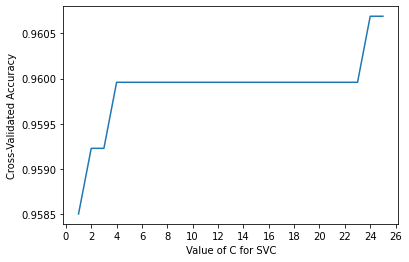

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

### Let us look into more detail of what is the exact value of C which is giving us a good accuracy score

In [23]:

C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9577753094255794, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.9585052364328787, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.959229874114038, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.9599598011213372, 0.959959801121337

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Taking kernel as rbf and taking different values gamma
Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

### Taking polynomial kernel with different degree

In [ ]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Conclusion
Amongst the  Linear ,Gaussian  and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction.

## SVM for Regression

In [24]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)

regr.predict([[1, 1]])

array([1.5])

## SVM is more suited for  the linear case in LinearSVC band and can scale almost linearly to millions of samples and/or features.